In [1]:
import csv
import os
import time

In [21]:
import numpy as np
import pandas as pd

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.chdir('C:/Users/diego/OneDrive/Escritorio/Proyectos para Git/Analisis iris//')

In [6]:
data=pd.read_csv('iris.csv',encoding='ISO-8859-1')

In [8]:
data.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
print(data.isnull().sum())

sepallength    0
sepalwidth     0
petallength    0
petalwidth     0
class          0
dtype: int64


<AxesSubplot:>

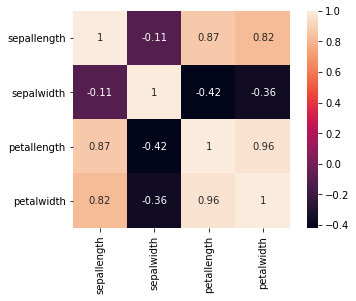

In [15]:
matrix = data[['sepallength','sepalwidth','petallength','petalwidth','class']]
sns.heatmap(matrix.corr(), square=True, annot=True)


In [16]:
from sklearn import linear_model
from sklearn.metrics import r2_score
regr=linear_model.LinearRegression()

In [19]:
x=data['petallength'].values
y=data['petalwidth'].values
X=x[:,np.newaxis]
regr.fit(X,y)
m=regr.coef_[0]
b=regr.intercept_ 

y_aprox=m*X+b
print('la recta de regresion posee la forma es:')
print('Y=',m,'x + ',b)

la recta de regresion posee la forma es:
Y= 0.4164191322854012 x +  -0.3665140452167275


In [20]:
print('el valor del error es:',r2_score(y,y_aprox))

el valor del error es: 0.9269012279220037


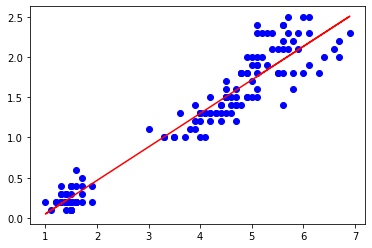

In [23]:
plt.scatter(x,y,color='blue')
plt.plot(x,y_aprox,color='red')

In [24]:
data.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [46]:
X=data.iloc[:,0:4]
Y=data.iloc[:,-1] 

In [47]:
from sklearn.model_selection import train_test_split

In [91]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,train_size=0.6,random_state=0)

In [92]:
from sklearn.tree import DecisionTreeClassifier

In [93]:
tree_=DecisionTreeClassifier(max_depth=4)
tree_iris=tree_.fit(X_train,Y_train)

In [94]:
from matplotlib import pyplot as plt
from sklearn import tree

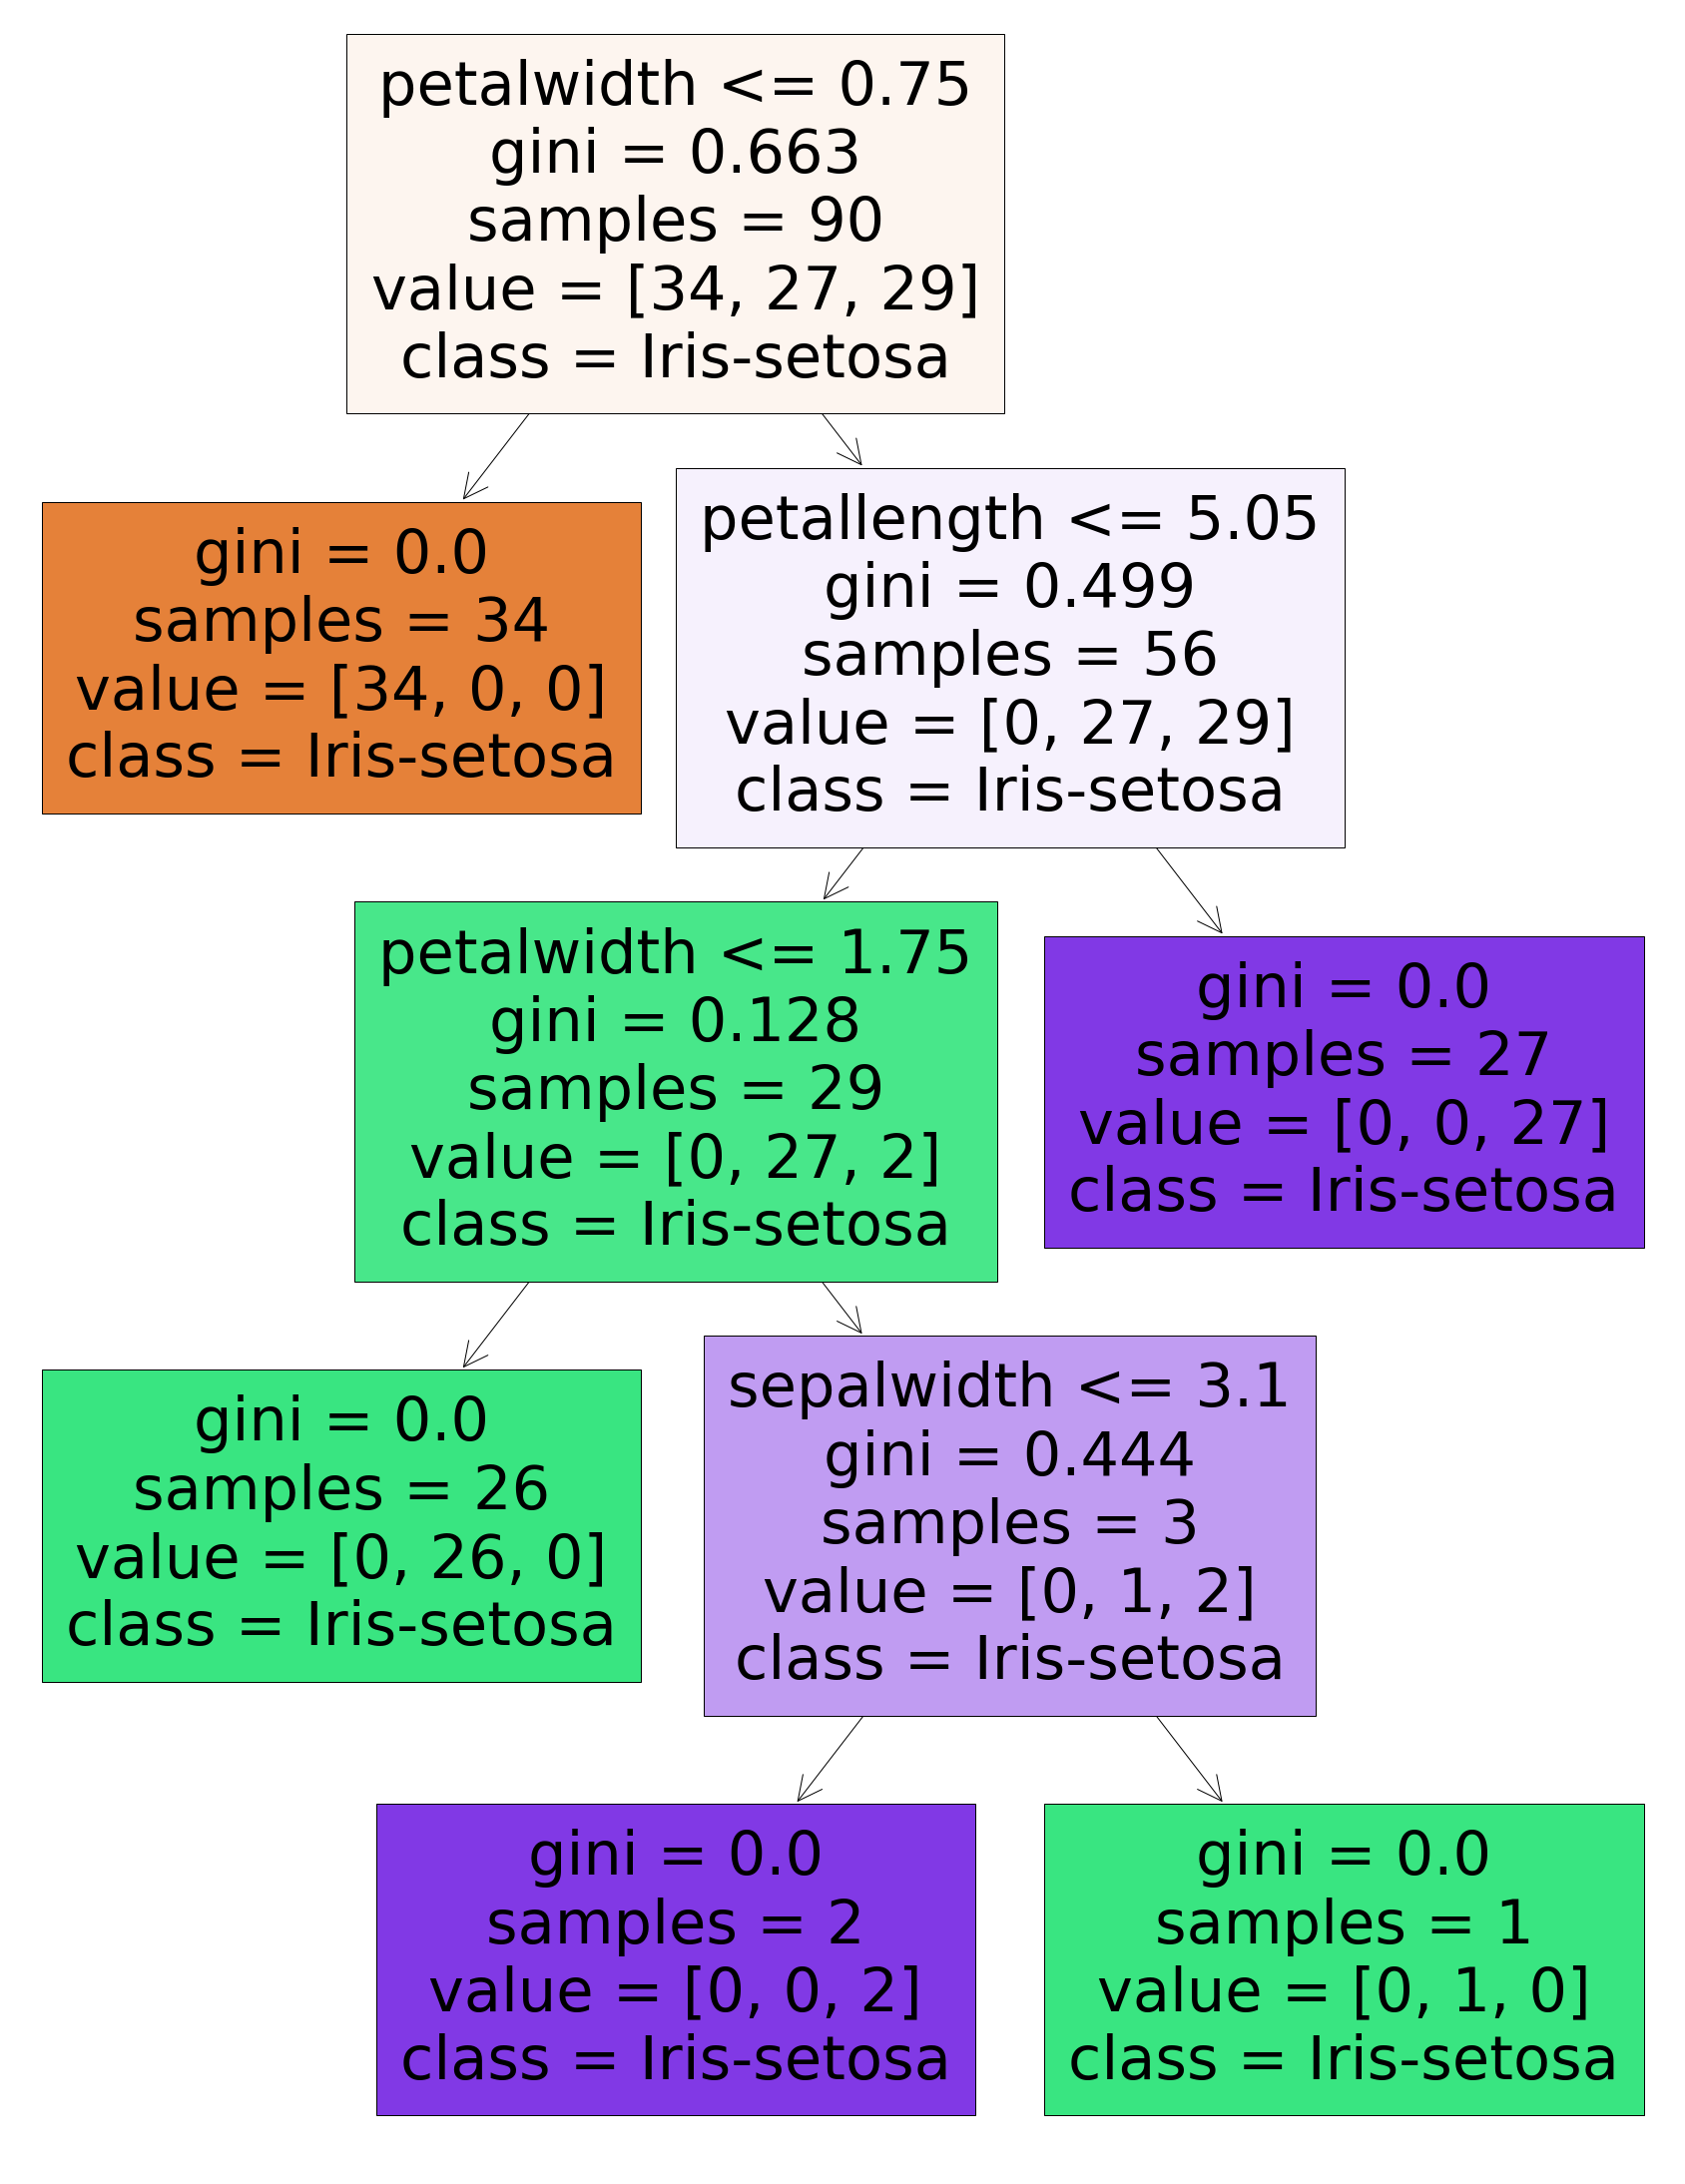

In [95]:
fig=plt.figure(figsize=(30,40))
tree.plot_tree(tree_iris,feature_names=list(X.columns.values),class_names=list(Y.values),filled=True)
plt.show()

In [96]:
fig.savefig("arbol_iris.png")

In [97]:
Y_pred=tree_iris.predict(X_test)
Y_pred 

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor'

In [98]:
from sklearn.metrics import confusion_matrix
matrix_confusion=confusion_matrix(Y_test,Y_pred)
matrix_confusion

array([[16,  0,  0],
       [ 0, 22,  1],
       [ 0,  2, 19]], dtype=int64)

In [99]:
press_tot=np.sum(matrix_confusion.diagonal()) / np.sum(matrix_confusion)
press_tot

0.95